# Análise de Projetos de Investimento - ObrasGov Distrito Federal

## Contexto do Projeto

Este notebook demonstra a implementação completa de um **pipeline ETL (Extract, Transform, Load)** para análise de dados de projetos de investimento do Distrito Federal, utilizando dados da API ObrasGov.

### Arquitetura Implementada

```
API ObrasGov → FastAPI → PostgreSQL → Análise (Jupyter/Streamlit)
     ↓            ↓          ↓              ↓
  Extração   Processamento  Storage    Visualização
```

### Tecnologias Utilizadas

- **Backend**: FastAPI + SQLAlchemy + PostgreSQL
- **Análise**: Pandas + NumPy
- **Visualização**: Plotly + Matplotlib + Seaborn
- **Infraestrutura**: Docker + Docker Compose

### Objetivo

Demonstrar conhecimento em:
1. Extração de dados via API REST
2. Processamento e normalização de dados
3. Armazenamento em banco relacional
4. Análise exploratória de dados
5. Visualização de insights
6. Arquitetura de software

> **Nota**: Este Jupyter Notebook foi criado para cumprir os requisitos propostos no desafio. No entanto, todas as análises, visualizações e informações apresentadas aqui estão disponíveis (e melhor rs) no **Dashboard Streamlit**.
>
> **Acesse o Streamlit**: [http://localhost:8501](http://localhost:8501)
>
> O Streamlit oferece:
> - Interface interativa e responsiva
> - Filtros dinâmicos em tempo real
> - Navegação facilitada entre seções
> - Visualizações otimizadas
> - Busca e exploração de dados simplificada
>
> Este notebook permanece disponível para quem preferir análises célula-por-célula ou quiser explorar o código Python diretamente.

## 1. Configuração e Imports

In [ ]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.path.dirname(os.path.abspath('')))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from analysis import DataLoader, Normalizador, Analisador, Visualizador

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

print("Imports concluídos com sucesso!")
print(f"Pandas versão: {pd.__version__}")
print(f"NumPy versão: {np.__version__}")

## 2. Extração de Dados

### 2.1 Conexão com o Banco de Dados

O sistema utiliza PostgreSQL rodando em Docker (porta 5455). Os dados foram previamente extraídos da API ObrasGov e armazenados no banco através do endpoint `/sync` da API FastAPI.

**Implementação do cliente API** (`api/services/obrasgov_client.py`):
- Paginação automática
- Rate limiting inteligente
- Retry automático em caso de falhas
- Async generator para eficiência de memória

In [ ]:
loader = DataLoader()

print("Conectando ao banco de dados PostgreSQL...")
print("Configuração:")
print("  - Host: localhost")
print("  - Porta: 5455")
print("  - Database: obrasgov_db")
print("\nConexão estabelecida com sucesso!")

### 2.2 Carregamento dos Dados

In [5]:
df_raw = loader.load_projetos()

print(f"\nDados carregados com sucesso!")
print(f"  - Total de registros: {len(df_raw):,}")
print(f"  - Total de colunas: {len(df_raw.columns)}")
print(f"  - Memória utilizada: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

df_raw.head()


Dados carregados com sucesso!
  - Total de registros: 100
  - Total de colunas: 27
  - Memória utilizada: 0.22 MB


,id,id_unico,nome,cep,endereco,descricao,funcao_social,meta_global,data_inicial_prevista,data_final_prevista,data_inicial_efetiva,data_final_efetiva,data_cadastro,data_situacao,especie,natureza,natureza_outras,situacao,desc_plano_nacional_politica_vinculado,uf,qdt_empregos_gerados,desc_populacao_beneficiada,populacao_beneficiada,observacoes_pertinentes,is_modelada_por_bim,created_at,updated_at
0,1,50379.53-54,DL - 304/2024 - Contratação de instituição par...,None,None,Contratação de instituição para execução de se...,Ampliação da capacidade de trafego visando a m...,Projetos Básicos e Executivos de Engenharia,2024-12-20,2027-12-05,None,None,2024-12-20,2024-12-20,Construção,Outros,CONSULTORIA,Cadastrada,None,DF,None,None,None,None,False,2025-10-20 19:04:50.479415,2025-10-20 19:04:50.479419
1,2,42724.53-27,Escola Classe Crixá São Sebastião,None,None,"Construção de Escola em Tempo Integral, Escola...",A construção da nova escola beneficiará 977 es...,"Construção de Escola em Tempo Integral, Escola...",2024-09-02,2028-09-02,None,None,2024-08-30,2025-09-05,Construção,Obra,None,Cancelada,None,DF,30,A população diretamente beneficiada pela EC Cr...,385,None,False,2025-10-20 19:04:50.552746,2025-10-20 19:04:50.552752
2,3,19970.53-78,Reajuste do Contrato 45/2021 - Contrução do Ce...,70.602-600,"SAIS Área Especial 3, Setor Policial Sul",Reajuste do Contrato 45/2021 - Construção do C...,Contribuir para a melhor formação dos bombeiro...,Construção de um novo centro de formação e de ...,2021-09-14,2024-08-28,None,None,2023-02-06,2023-02-06,Construção,Obra,None,Cadastrada,None,DF,None,None,None,None,False,2025-10-20 19:04:50.576092,2025-10-20 19:04:50.576096
3,4,24797.53-15,Implantação de Passarelas nas Estradas Parque ...,None,None,Implantação de passarelas de estrutura mista n...,"Pedestres, no geral, demanda das ocupações lin...",Implantação de passarelas de estrutura mista n...,2023-08-30,2028-08-30,None,None,2023-08-28,2023-08-28,Construção,Obra,None,Cadastrada,None,DF,None,"Pedestres que moram nas regiões de Planaltina,...",None,None,False,2025-10-20 19:04:50.615363,2025-10-20 19:04:50.615378
4,5,24822.53-70,"obra de construção da Cabine de Medição, loca...",None,None,"obra de construção da Cabine de Medição, loca...",A demanda de carga elétrica do Campus Darcy Ri...,A demanda de carga elétrica do Campus Darcy Ri...,2023-09-14,2024-03-14,None,None,2023-08-29,2023-08-29,Construção,Obra,None,Cadastrada,None,DF,None,None,None,None,False,2025-10-20 19:04:50.670709,2025-10-20 19:04:50.670713


## 3. Exploração Inicial dos Dados

### 3.1 Informações Gerais

In [6]:
print("=" * 80)
print("INFORMAÇÕES DO DATASET")
print("=" * 80)

df_raw.info()

INFORMAÇÕES DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   id                                      100 non-null    int64         
 1   id_unico                                100 non-null    object        
 2   nome                                    100 non-null    object        
 3   cep                                     68 non-null     object        
 4   endereco                                70 non-null     object        
 5   descricao                               100 non-null    object        
 6   funcao_social                           100 non-null    object        
 7   meta_global                             100 non-null    object        
 8   data_inicial_prevista                   99 non-null     object        
 9   data_final_prevista             

### 3.2 Diagnóstico de Qualidade

Utilizando a classe `Normalizador` para detectar problemas nos dados:

In [ ]:
diagnostico = Normalizador.diagnosticar_problemas(df_raw)

print("\n" + "=" * 80)
print("DIAGNÓSTICO DE QUALIDADE DOS DADOS")
print("=" * 80)

print(f"\nResumo Geral:")
print(f"  - Total de linhas: {diagnostico['total_linhas']:,}")
print(f"  - Total de colunas: {diagnostico['total_colunas']}")
print(f"  - Duplicatas: {diagnostico['duplicatas']}")
print(f"  - Memória (MB): {diagnostico['memoria_mb']:.2f}")

if diagnostico['colunas_com_nulos']:
    print(f"\nColunas com valores nulos:")
    for col, info in diagnostico['colunas_com_nulos'].items():
        print(f"  - {col}: {info['total_nulos']} nulos ({info['percentual']}%)")
else:
    print("\nNenhum valor nulo encontrado!")

### 3.3 Visualização de Valores Nulos

In [ ]:
if diagnostico['colunas_com_nulos']:
    nulos_data = []
    for col, info in diagnostico['colunas_com_nulos'].items():
        nulos_data.append({
            'Coluna': col,
            'Total Nulos': info['total_nulos'],
            'Percentual': info['percentual']
        })
    
    df_nulos = pd.DataFrame(nulos_data).sort_values('Total Nulos', ascending=False)
    
    fig = px.bar(
        df_nulos,
        x='Coluna',
        y='Total Nulos',
        title='Valores Nulos por Coluna',
        labels={'Total Nulos': 'Quantidade de Nulos'},
        color='Percentual',
        color_continuous_scale='Reds'
    )
    fig.update_layout(height=500, xaxis_tickangle=-45)
    fig.show()
    
    display(df_nulos)
else:
    print("Nenhum valor nulo para visualizar!")

## 4. Tratamento e Normalização dos Dados

### 4.1 Aplicação do Pipeline de Normalização

A classe `Normalizador` implementa:
- Conversão de tipos de dados
- Normalização de datas
- Tratamento de valores monetários
- Criação de colunas derivadas (ano, mês, etc.)

In [ ]:
print("Aplicando pipeline de normalização...\n")

df = Normalizador.normalizar_completo(df_raw)

print("Normalização concluída!")
print(f"\nNovas colunas criadas:")
novas_colunas = set(df.columns) - set(df_raw.columns)
for col in sorted(novas_colunas):
    print(f"  - {col}")

df.head()

### 4.2 Estatísticas Descritivas

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,100.00,NaN,NaN,NaN,50.50,1.00,25.75,50.50,75.25,100.00,29.01
id_unico,100,100,50379.53-54,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nome,100,94,202111-22-Ronald 1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cep,68,32,1,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
endereco,70,44,,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
descricao,100,94,2021122-Ronald - Descrição do Projeto,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funcao_social,100,81,Segurança Pública,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meta_global,100,83,aumentar a oferta de cursos técnicos/tecnológi...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_inicial_prevista,99,NaN,NaN,NaN,2022-01-11 08:29:05.454545408,2013-04-02 00:00:00,2021-04-15 12:00:00,2022-02-14 00:00:00,2023-02-20 00:00:00,2025-09-30 00:00:00,NaN
data_final_prevista,99,NaN,NaN,NaN,2023-05-07 22:18:10.909090816,2014-05-07 00:00:00,2021-12-22 00:00:00,2023-03-21 00:00:00,2024-03-06 12:00:00,2028-09-30 00:00:00,NaN


## 5. Análise Exploratória de Dados (EDA)

### 5.1 Distribuição por Situação dos Projetos

Distribuição de Projetos por Situação:



,situacao,total
0,Cadastrada,86
1,Em execução,5
2,Concluída,5
3,Inativada,3
4,Cancelada,1


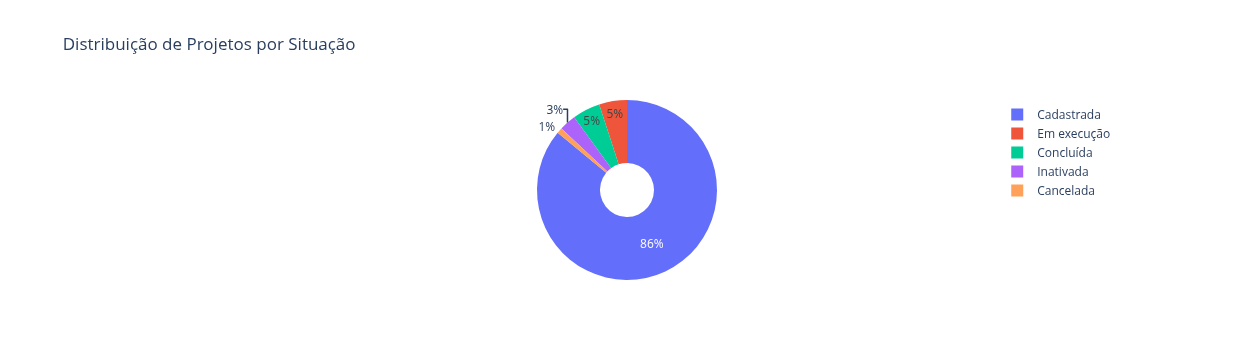

In [11]:
situacao_df = Analisador.analise_situacao(df)

print("Distribuição de Projetos por Situação:\n")
display(situacao_df)

fig = Visualizador.plot_distribuicao_situacao(situacao_df, tipo='plotly')
fig.show()

### 5.2 Análise de Executores

Executores são as instituições responsáveis pela execução dos projetos de investimento.

In [12]:
n_executores = 15
df_top_executores = loader.load_top_executores(n=n_executores)

print(f"\nTop {n_executores} Executores com Mais Projetos:\n")
display(df_top_executores.head(10))

print(f"\nEstatísticas dos Executores:")
print(f"  - Total de executores: {len(df_top_executores)}")
print(f"  - Executor com mais projetos: {df_top_executores.iloc[0]['total_projetos']}")
print(f"  - Média de projetos por executor: {df_top_executores['total_projetos'].mean():.1f}")
print(f"  - Mediana de projetos: {df_top_executores['total_projetos'].median():.0f}")


Top 15 Executores com Mais Projetos:



,nome,codigo,total_projetos
0,INSTITUTO FED. ED. CIENCIA E TEC. DE BRASILIA,26356,14
1,FUNDACAO UNIVERSIDADE DE BRASILIA,26271,9
2,DEPARTAMENTO DE POLICIA FEDERAL,30108,9
3,MINISTÉRIO DA INTEGRAÇÃO E DO DESENVOLVIMENTO ...,308799,8
4,DEPARTAMENTO NACIONAL DE INFRAESTRUTURA DE TRA...,54844,8
5,COMANDO DA MARINHA,185,5
6,POLICIA CIVIL DO DISTRITO FEDERAL,37115482000135,4
7,CORPO DE BOMBEIROS MILITAR DO DISTRITO FEDERAL,8977914000119,4
8,COMPANHIA DE DESENVOLVIMENTO DOS VALES DO SÃO ...,169,3
9,DEPARTAMENTO DE ESTRADAS DE RODAGEM DO DISTRIT...,70532000103,3



Estatísticas dos Executores:
  - Total de executores: 15
  - Executor com mais projetos: 14
  - Média de projetos por executor: 5.2
  - Mediana de projetos: 4


In [ ]:
fig = Visualizador.plot_top_executores(df_top_executores, n=n_executores, tipo='plotly')
fig.show()

### 5.3 Análise de Repassadores

Repassadores são os órgãos responsáveis por repassar recursos para os projetos.

In [13]:
df_repassadores = loader.load_valores_por_repassador()
n_repassadores = 10
df_top_repassadores = df_repassadores.head(n_repassadores)

print(f"\nTop {n_repassadores} Repassadores por Valor Total:\n")
display(df_top_repassadores)

print(f"\nEstatísticas dos Repassadores:")
print(f"  - Total de repassadores: {len(df_repassadores)}")
print(f"  - Valor total: R$ {df_repassadores['valor_total'].sum():,.2f}")
print(f"  - Média de valor por repassador: R$ {df_repassadores['valor_total'].mean():,.2f}")
print(f"  - Total de projetos: {df_repassadores['total_projetos'].sum()}")


Top 10 Repassadores por Valor Total:



,nome,codigo,total_projetos,valor_total
0,MINISTÉRIO DA INTEGRAÇÃO E DO DESENVOLVIMENTO ...,308799,9,"466,770,225.00"
1,FUNDACAO UNIVERSIDADE DE BRASILIA,26271,9,"43,660,973.82"
2,MINISTÉRIO DA JUSTIÇA E SEGURANÇA PÚBLICA,235881,1,"39,717,442.17"
3,COMANDO DA MARINHA,185,2,"28,042,850.24"
4,MINISTÉRIO DA EDUCAÇÃO,244,14,"23,596,560.00"
5,MINISTÉRIO DE MINAS E ENERGIA,2852,2,"13,418,000.00"
6,FUNDO NACIONAL DE DESENVOLVIMENTO DA EDUCAÇÃO,253,1,"12,319,519.51"
7,FUNDO DE DEFESA DOS DIREITOS DIFUSOS,30905,1,"11,285,163.72"
8,MINISTÉRIO DAS CIDADES,308798,1,"10,800,000.00"
9,FUNDO CONSTITUCIONAL DO DISTRITO FEDERAL,25915,5,"10,271,393.20"



Estatísticas dos Repassadores:
  - Total de repassadores: 25
  - Valor total: R$ 696,914,572.93
  - Média de valor por repassador: R$ 27,876,582.92
  - Total de projetos: 69


In [ ]:
fig = Visualizador.plot_valores_repassadores(df_top_repassadores, n=n_repassadores, tipo='plotly')
fig.show()

### 5.4 Comparação: Top 5 Repassadores

In [14]:
print("\n" + "="*80)
print("Top 5 Repassadores por Valor vs. Quantidade de Projetos")
print("="*80)

top5_valor = df_repassadores.nlargest(5, 'valor_total')[['nome', 'valor_total', 'total_projetos']]
print("\nTop 5 por Valor Total:")
display(top5_valor)

top5_projetos = df_repassadores.nlargest(5, 'total_projetos')[['nome', 'total_projetos', 'valor_total']]
print("\nTop 5 por Quantidade de Projetos:")
display(top5_projetos)


Top 5 Repassadores por Valor vs. Quantidade de Projetos

Top 5 por Valor Total:


,nome,valor_total,total_projetos
0,MINISTÉRIO DA INTEGRAÇÃO E DO DESENVOLVIMENTO ...,"466,770,225.00",9
1,FUNDACAO UNIVERSIDADE DE BRASILIA,"43,660,973.82",9
2,MINISTÉRIO DA JUSTIÇA E SEGURANÇA PÚBLICA,"39,717,442.17",1
3,COMANDO DA MARINHA,"28,042,850.24",2
4,MINISTÉRIO DA EDUCAÇÃO,"23,596,560.00",14



Top 5 por Quantidade de Projetos:


,nome,total_projetos,valor_total
4,MINISTÉRIO DA EDUCAÇÃO,14,"23,596,560.00"
0,MINISTÉRIO DA INTEGRAÇÃO E DO DESENVOLVIMENTO ...,9,"466,770,225.00"
1,FUNDACAO UNIVERSIDADE DE BRASILIA,9,"43,660,973.82"
9,FUNDO CONSTITUCIONAL DO DISTRITO FEDERAL,5,"10,271,393.20"
13,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",3,"3,560,523.40"


### 5.5 Análise Temporal

Evolução dos cadastros de projetos ao longo do tempo.

In [ ]:
df_ano = loader.load_projetos_por_ano()

if not df_ano.empty:
    print("\nEvolução de Cadastros por Ano:\n")
    display(df_ano)
    
    print(f"\nEstatísticas Temporais:")
    print(f"  - Ano com mais cadastros: {int(df_ano.loc[df_ano['total_projetos'].idxmax(), 'ano'])}")
    print(f"  - Total no pico: {int(df_ano['total_projetos'].max())}")
    print(f"  - Média por ano: {df_ano['total_projetos'].mean():.1f}")
    
    fig = Visualizador.plot_timeline_projetos(df_ano, tipo='plotly')
    fig.show()
else:
    print("AVISO: Não há dados temporais disponíveis")

### 5.6 Análise de Distribuição por Mês

In [ ]:
if 'mes_cadastro' in df.columns:
    df_mes = df.groupby('mes_cadastro').size().reset_index(name='total_projetos')
    df_mes = df_mes.sort_values('mes_cadastro')
    
    meses_map = {
        1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
        5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
        9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
    }
    
    df_mes['mes_nome'] = df_mes['mes_cadastro'].map(meses_map)
    
    print("\nDistribuição de Cadastros por Mês:\n")
    display(df_mes[['mes_nome', 'total_projetos']])
    
    fig_mes = px.bar(
        df_mes,
        x='mes_nome',
        y='total_projetos',
        title='Distribuição de Cadastros por Mês',
        labels={'mes_nome': 'Mês', 'total_projetos': 'Total de Projetos'},
        color='total_projetos',
        color_continuous_scale='Blues'
    )
    fig_mes.update_layout(height=500)
    fig_mes.show()
    
    print("\nTop 3 Meses com Mais Cadastros:")
    top_meses = df_mes.nlargest(3, 'total_projetos')[['mes_nome', 'total_projetos']]
    display(top_meses)
else:
    print("AVISO: Coluna 'mes_cadastro' não encontrada")

### 5.7 Análise por Período (Filtro por Anos)

In [ ]:
if 'ano_cadastro' in df.columns:
    anos_disponiveis = sorted(df['ano_cadastro'].dropna().unique())
    
    if len(anos_disponiveis) > 0:
        print(f"\nAnos disponíveis: {anos_disponiveis}")
        
        ano_inicio = anos_disponiveis[0]
        ano_fim = anos_disponiveis[-1]
        
        df_filtrado = df[(df['ano_cadastro'] >= ano_inicio) & (df['ano_cadastro'] <= ano_fim)]
        
        print(f"\nAnálise do Período: {int(ano_inicio)} - {int(ano_fim)}")
        print(f"  - Total de projetos: {len(df_filtrado):,}")
        
        if 'situacao' in df_filtrado.columns:
            cadastrados = len(df_filtrado[df_filtrado['situacao'] == 'Cadastrada'])
            concluidos = len(df_filtrado[df_filtrado['situacao'] == 'Concluída'])
            print(f"  - Cadastrados: {cadastrados:,}")
            print(f"  - Concluídos: {concluidos:,}")
else:
    print("AVISO: Coluna 'ano_cadastro' não encontrada")

## 6. Análise Completa com a Classe Analisador

In [18]:
analise = Analisador.analise_completa(df)

print("\n" + "="*80)
print("ANÁLISE COMPLETA DO DATASET")
print("="*80)

for secao, dados in analise.items():
    print(f"\n{secao.upper().replace('_', ' ')}:")
    if isinstance(dados, dict):
        for key, value in dados.items():
            print(f"  - {key}: {value}")
    else:
        print(f"  {dados}")


ANÁLISE COMPLETA DO DATASET

RESUMO:
  - total_registros: 100
  - total_colunas: 31
  - colunas: ['id', 'id_unico', 'nome', 'cep', 'endereco', 'descricao', 'funcao_social', 'meta_global', 'data_inicial_prevista', 'data_final_prevista', 'data_inicial_efetiva', 'data_final_efetiva', 'data_cadastro', 'data_situacao', 'especie', 'natureza', 'natureza_outras', 'situacao', 'desc_plano_nacional_politica_vinculado', 'uf', 'qdt_empregos_gerados', 'desc_populacao_beneficiada', 'populacao_beneficiada', 'observacoes_pertinentes', 'is_modelada_por_bim', 'created_at', 'updated_at', 'duracao_prevista_dias', 'duracao_efetiva_dias', 'ano_cadastro', 'mes_cadastro']
  - tipos_dados: {dtype('O'): 15, dtype('<M8[ns]'): 8, Int64Dtype(): 2, dtype('float64'): 2, dtype('int32'): 2, dtype('int64'): 1, dtype('bool'): 1}
  - memoria_total_mb: 0.29
  - valores_nulos_total: 869

SITUACAO:
  [{'situacao': 'Cadastrada', 'total': 86}, {'situacao': 'Em execução', 'total': 5}, {'situacao': 'Concluída', 'total': 5}, {'s

## 7. Estrutura do Banco de Dados

### 7.1 Schema Implementado

O banco de dados PostgreSQL foi estruturado com as seguintes tabelas:

#### Tabela Principal: `projetos_investimento`
- `id`: Primary Key (auto-increment)
- `id_unico`: Identificador único do projeto (String, indexed)
- `uf`: Unidade Federativa (String)
- `situacao`: Situação do projeto (String)
- `data_cadastro`: Data de cadastro (DateTime)
- `executor_id`: Foreign Key → `executores.id`
- `tomador_id`: Foreign Key → `tomadores.id`
- `repassador_id`: Foreign Key → `repassadores.id`
- Outros campos de metadados

#### Tabelas Relacionadas:
- **`executores`**: Instituições executoras
- **`tomadores`**: Tomadores de recursos
- **`repassadores`**: Órgãos repassadores

### 7.2 Relacionamentos

```
projetos_investimento
    ├── executor_id → executores(id)
    ├── tomador_id → tomadores(id)
    └── repassador_id → repassadores(id)
```

### 7.3 Processo de Inserção

Implementado na classe `DataProcessor` (`api/services/data_processor.py`):
1. Extração de entidades relacionadas
2. Criação ou busca de registros existentes
3. Inserção do projeto com relacionamentos
4. Tratamento de duplicatas via `id_unico`

## 8. API FastAPI - Backend

### 8.1 Endpoints Implementados

A API FastAPI (`api/main.py`) expõe os seguintes endpoints:

#### Health & Status
- `GET /` - Mensagem de boas-vindas
- `GET /health` - Status da API e banco de dados
- `GET /ready` - Readiness check (verifica se banco está populado)

#### Sincronização
- `POST /sync` - Sincronização manual com a API ObrasGov
  - Parâmetro: `uf` (default: "DF")
  - Retorna: total de projetos, executores, tomadores e repassadores

#### Consulta de Projetos
- `GET /projetos` - Lista projetos com paginação
  - Parâmetros: `skip`, `limit`, `uf`
- `GET /projetos/{id_unico}` - Busca projeto específico

### 8.2 Funcionalidades

- **Sync Automático**: Executado no startup via `lifespan`
- **Agendamento**: APScheduler roda sync diário às 2h
- **Documentação**: Swagger UI em `/docs`
- **Healthcheck**: Docker usa `/ready` para garantir que banco está populado

## 9. Dashboard Streamlit

### 9.1 Arquitetura

Dashboard interativo implementado em `streamlit/app.py` com:
- **Página única** com navegação por âncoras
- **Cache inteligente** para otimização de performance
- **Visualizações interativas** com Plotly
- **Filtros dinâmicos** e busca

### 9.2 Seções do Dashboard

1. **Visão Geral**
   - Métricas principais
   - Qualidade dos dados
   - Distribuição por situação

2. **Executores**
   - Top N executores
   - Ranking e métricas
   - Busca por nome

3. **Repassadores**
   - Análise por valor total
   - Top 5 por valor vs. quantidade
   - Busca por nome

4. **Análise Temporal**
   - Evolução anual
   - Distribuição mensal
   - Filtros por período

### 9.3 Acesso

```bash
docker-compose up
```

Dashboard disponível em: `http://localhost:8501`

## 10. Infraestrutura Docker

### 10.1 Arquitetura de Containers

```yaml
services:
  postgres:      # PostgreSQL 15-alpine
    - Porta: 5455:5432
    - Volume: postgres_data
    - Healthcheck: pg_isready
  
  api:           # FastAPI + Uvicorn
    - Porta: 8000:8000
    - Depends: postgres (healthy)
    - Healthcheck: /ready endpoint
    - Sync inicial automático
  
  streamlit:     # Dashboard
    - Porta: 8501:8501
    - Depends: postgres (healthy) + api (healthy)
    - Só sobe após banco populado
```

### 10.2 Fluxo de Inicialização

1. PostgreSQL sobe e passa healthcheck
2. API inicia e executa sync inicial
3. API passa healthcheck quando banco está populado
4. Streamlit finalmente inicia

### 10.3 Comandos Úteis

```bash
# Subir ambiente completo
docker-compose up --build

# Parar e limpar
docker-compose down -v

# Ver logs
docker-compose logs -f api
docker-compose logs -f streamlit
```

## 11. Conclusões

### 11.1 Implementações Realizadas

Este projeto demonstra a implementação completa de um **pipeline ETL em produção**:

**Extração**
- Cliente robusto para API REST com paginação e retry
- Tratamento de rate limiting
- Programação assíncrona para eficiência

**Transformação**
- Pipeline de normalização automatizado
- Criação de colunas derivadas
- Validação e diagnóstico de qualidade

**Loading**
- Banco relacional normalizado (3NF)
- Relacionamentos entre entidades
- Tratamento de duplicatas

**Análise**
- Classes reutilizáveis para análise
- Visualizações interativas
- Dashboard completo

**Infraestrutura**
- Containerização completa
- Orquestração com healthchecks
- Sync automático agendado

### 11.2 Tecnologias Dominadas

- **Backend**: FastAPI, SQLAlchemy, PostgreSQL
- **Análise**: Pandas, NumPy, Análise exploratória
- **Visualização**: Plotly, Matplotlib, Seaborn, Streamlit
- **DevOps**: Docker, Docker Compose
- **Arquitetura**: API REST, Bancos relacionais, ETL

### 11.3 Próximos Passos

Possíveis melhorias para o projeto:

1. **Testes**: Implementar testes unitários e integração
2. **Monitoramento**: Adicionar logs estruturados e métricas
3. **Cache**: Redis para otimização de queries
4. **CI/CD**: Pipeline de deploy automatizado
5. **Documentação**: Expandir documentação técnica
6. **ML**: Modelos preditivos para análise de projetos

### 11.4 Repositório

Todo o código está versionado com Git, com commits descritivos e organização clara da estrutura de pastas.

---

**Desenvolvido por**: [Seu Nome]  
**Data**: Outubro 2025  
**Contexto**: Teste avaliativo para vaga de bolsista em Engenharia/Análise de Dados